In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm 
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

In [2]:
geo = pd.read_csv('geo_full.csv', sep = ';') 

In [3]:
geo.head()

,V1,lat,lon,postal_code,city
0,481,"50,1012","18,5126",44-200,rybnik
1,572,"50,272","19,0299",40-169,katowice
2,747,"50,272","19,0299",40-169,katowice
3,751,"50,272","19,0299",40-169,katowice
4,841,"50,272","19,0299",40-169,katowice


In [4]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122593 entries, 0 to 122592
Data columns (total 5 columns):
V1             122593 non-null int64
lat            122593 non-null object
lon            122593 non-null object
postal_code    122593 non-null object
city           122593 non-null object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


In [5]:
geo = geo[geo.lon != ' ']

In [6]:
geo['lat'] = geo['lat'].str.replace(',','.')
geo['lon'] = geo['lon'].str.replace(',','.')

In [7]:
geo['lat'] = geo['lat'].astype(float)
geo['lon'] = geo['lon'].astype(float)

In [8]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122515 entries, 0 to 122589
Data columns (total 5 columns):
V1             122515 non-null int64
lat            122515 non-null float64
lon            122515 non-null float64
postal_code    122515 non-null object
city           122515 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 5.6+ MB


In [9]:
geo.head()

,V1,lat,lon,postal_code,city
0,481,50.1012,18.5126,44-200,rybnik
1,572,50.2720,19.0299,40-169,katowice
2,747,50.2720,19.0299,40-169,katowice
3,751,50.2720,19.0299,40-169,katowice
4,841,50.2720,19.0299,40-169,katowice


In [10]:
geo['postal_code'] = geo['postal_code'].str.replace('-','.')
geo['postal_code'] = geo['postal_code'].astype(float)

In [11]:
geo.head()

,V1,lat,lon,postal_code,city
0,481,50.1012,18.5126,44.200,rybnik
1,572,50.2720,19.0299,40.169,katowice
2,747,50.2720,19.0299,40.169,katowice
3,751,50.2720,19.0299,40.169,katowice
4,841,50.2720,19.0299,40.169,katowice


In [12]:
geo.drop('V1', axis =1, inplace=True)

/Users/js/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(*args, **kw)>

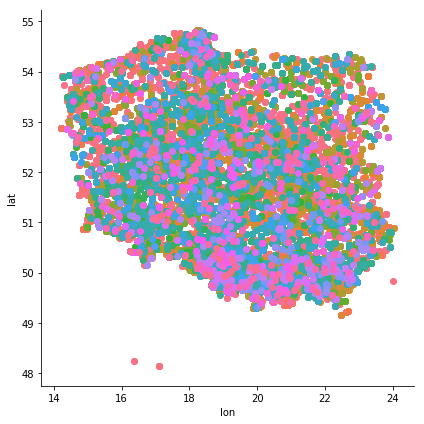

In [13]:
import seaborn as sns
sns.FacetGrid(geo, hue="city", size = 6) \
    .map(plt.scatter, "lon", "lat")

plt.show

In [14]:
geo.city.unique()

array(['rybnik', 'katowice', 'szczecin', ..., 'parysow', 'kluszkowce',
       'miedzianagora'], dtype=object)

In [15]:
geo.shape
geo.head()

,lat,lon,postal_code,city
0,50.1012,18.5126,44.200,rybnik
1,50.2720,19.0299,40.169,katowice
2,50.2720,19.0299,40.169,katowice
3,50.2720,19.0299,40.169,katowice
4,50.2720,19.0299,40.169,katowice


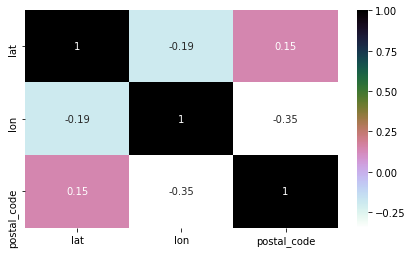

In [16]:
plt.figure(figsize=(7,4)) 
sns.heatmap(geo.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [17]:
train, test = train_test_split(geo, test_size = 0.3)

In [18]:
train_X = train[['lat','lon']]
train_y=train.city
test_X= test[['lat','lon']] 
test_y =test.city  

In [19]:
train_y.head(2)

112758      zernica
97442     glubczyce
Name: city, dtype: object

In [ ]:
model = svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))

/Users/js/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

In [ ]:
model=KNeighborsClassifier(n_neighbors=10) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

In [ ]:
geo.info()